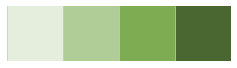

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

colors_nude = ['#e5eedc', '#b1cd97', '#7dac52', '#4b6731']
sns.palplot(sns.color_palette(colors_nude))
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('.\\datasets\\netflix_titles.csv')

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
df.shape

(8807, 12)

# <b>1 <span style='color:#0386f7de'>|</span> Structure Investigation </b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# change datatype of date_added column to datetime

df['date_added'] = df['date_added'].apply(lambda x: str(x).strip())
df['date_added'] = pd.to_datetime(df['date_added'],
                                 format='%B %d, %Y')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [16]:
# describe the dataframe - numerical

df.describe(include=['number'])

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
# describe the dataframe - exclude numerical

df.describe(exclude=['number'])

C:\Users\ichfa\AppData\Local\Temp/ipykernel_7892/1418341588.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=['number'])


,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1714,17,220,514,8775
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01 00:00:00,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,110,3207,1793,362,4
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN


- show_id column is like an index column
- type column, there are 2 unique values & they are movie & tv show
- title column, all of it are unique values and it means no duplication in this dataset
- director column, there are 4528 unique directors
- cast column, all of it are unique values
- country column, there are 748 unique values
- rating column, there are 17 different unique values

In [22]:
# drop show_id column, it is like index

df.drop('show_id', axis=1, inplace=True)

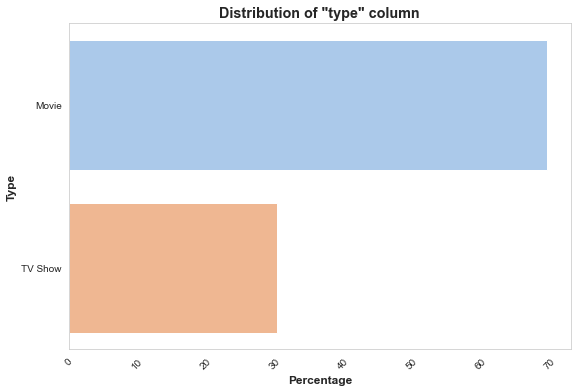

In [72]:
# distribution of type column

plt.figure(figsize=(9,6))
sns.barplot(x =df.type.value_counts(normalize=True).values*100, 
            y =df.type.value_counts(normalize=True).index,
            palette='pastel', 
           )

plt.xlabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Type', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "type" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\dist_type.png')
plt.show()

In [34]:
# let's find the distribution of country

# df.country.value_counts()

In [74]:
country = df.dropna(axis=0, subset=['country'])
country = country['country'].str.split(', ', expand=True)
country = country.stack()
country = country.reset_index(level = 1, drop = True)

country.value_counts(normalize=True).head(10) 

United States     0.368384
India             0.104454
United Kingdom    0.080288
Canada            0.044438
France            0.039245
Japan             0.031756
Spain             0.023168
South Korea       0.023068
Germany           0.022568
Mexico            0.016876
dtype: float64

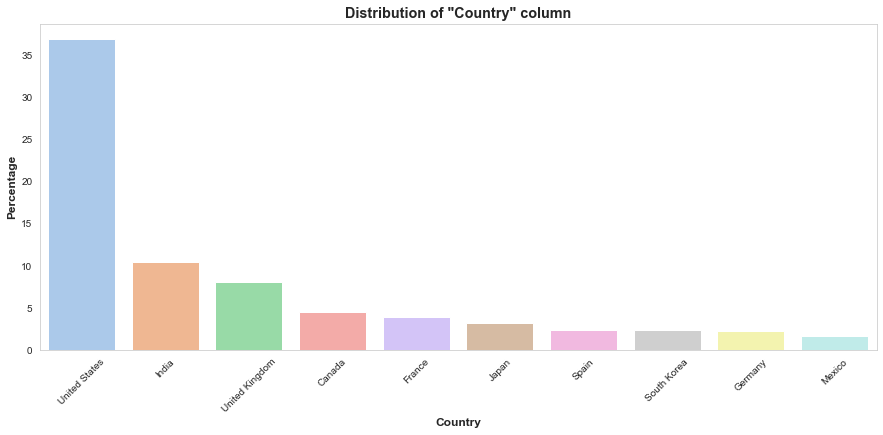

In [75]:
# distribution of top 10 countries

plt.figure(figsize=(15,6))
sns.barplot(x =country.value_counts(normalize=True).head(10).index, 
            y =country.value_counts(normalize=True).head(10).values*100,
            palette='pastel', 
           )

plt.xlabel('Country', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "Country" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\dist_country.png')
plt.show()

In [76]:
country_movie = df[df['type']=='Movie'].dropna(axis=0, subset=['country'])
country_movie = country_movie['country'].str.split(', ', expand=True)
country_movie = country_movie.stack()
country_movie = country_movie.reset_index(level = 1, drop = True)
country_movie = country_movie.reset_index(drop=True).value_counts(normalize=True).reset_index()

country_tv = df[df['type']=='TV Show'].dropna(axis=0, subset=['country'])
country_tv = country_tv['country'].str.split(', ', expand=True)
country_tv = country_tv.stack()
country_tv = country_tv.reset_index(level = 1, drop = True)
country_tv = country_tv.reset_index(drop=True).value_counts(normalize=True).reset_index()

country_tv_mov = pd.merge(country_movie, country_tv, how='outer', on='index')
country_tv_mov.fillna(0, inplace=True)
country_tv_mov.columns = ['country', 'movie', 'tv']
country_tv_mov['total'] = country_tv_mov['movie'] + country_tv_mov['tv']

In [77]:
country_tv_mov.head()

,country,movie,tv,total
0,United States,0.373068,0.355303,0.728371
1,India,0.130458,0.031818,0.162277
2,United Kingdom,0.072145,0.103030,0.175176
3,Canada,0.043260,0.047727,0.090987
4,France,0.041090,0.034091,0.075181


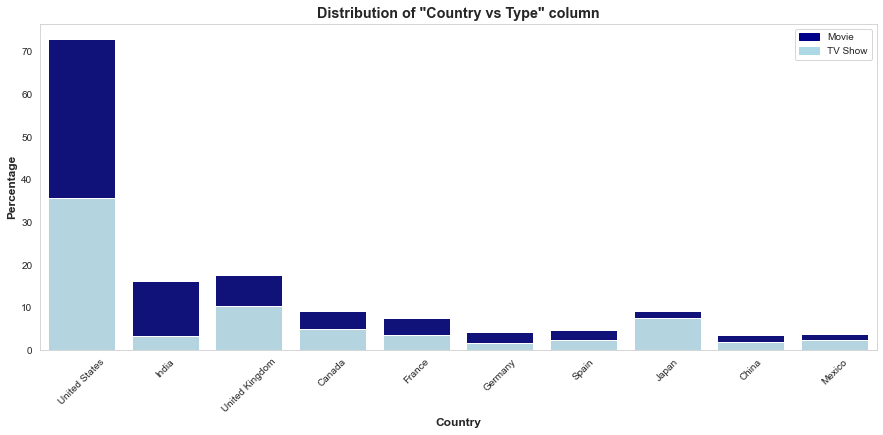

In [78]:
# distribution of top 10 countries

plt.figure(figsize=(15,6))
sns.barplot(x =country_tv_mov['country'].head(10), 
            y =country_tv_mov['total'].head(10)*100,
           color='darkblue')
            
sns.barplot(x =country_tv_mov['country'].head(10), 
            y =country_tv_mov['tv'].head(10)*100,
           color='lightblue')

plt.xlabel('Country', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "Country vs Type" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Movie')
bottom_bar = mpatches.Patch(color='lightblue', label='TV Show')
plt.legend(handles=[top_bar, bottom_bar])

plt.savefig('.\\assets\\dist_countryvstype.png')
plt.grid(False)
plt.show()

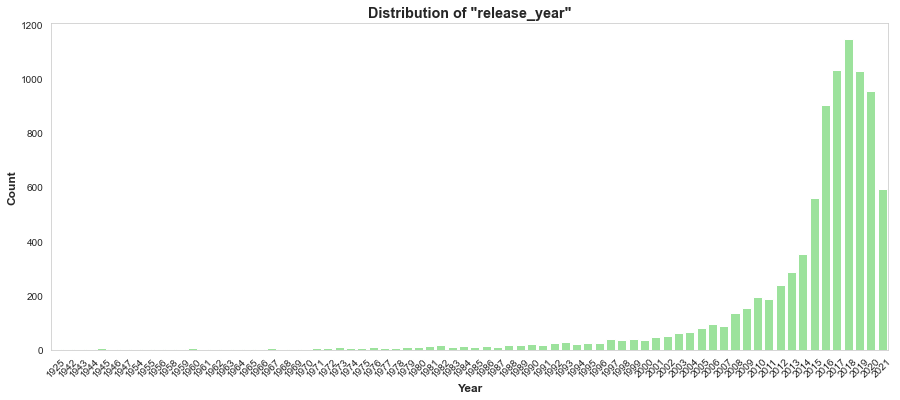

In [79]:
# distribution of release_year

plt.figure(figsize=(15,6))
sns.countplot(x=df['release_year'], 
              color='lightgreen')

plt.xlabel('Year', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Count', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "release_year"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_year.png')
plt.grid(False)
plt.show()

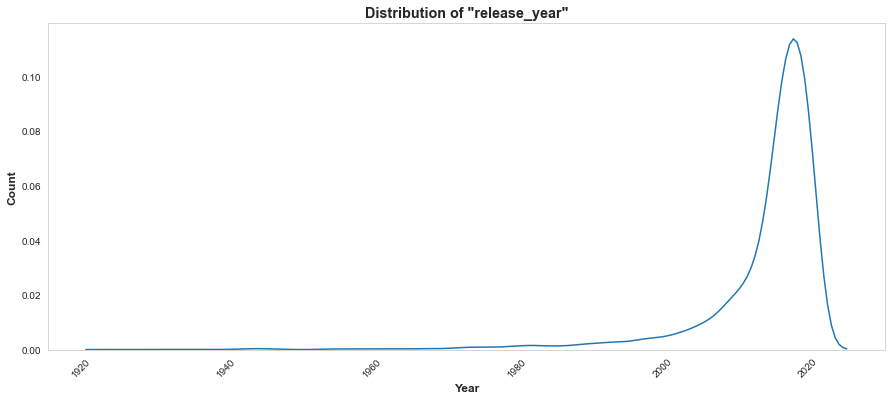

In [80]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df['release_year'], 
              palette='pastel')

plt.xlabel('Year', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Count', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "release_year"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_year_kde.png')
plt.grid(False)
plt.show()

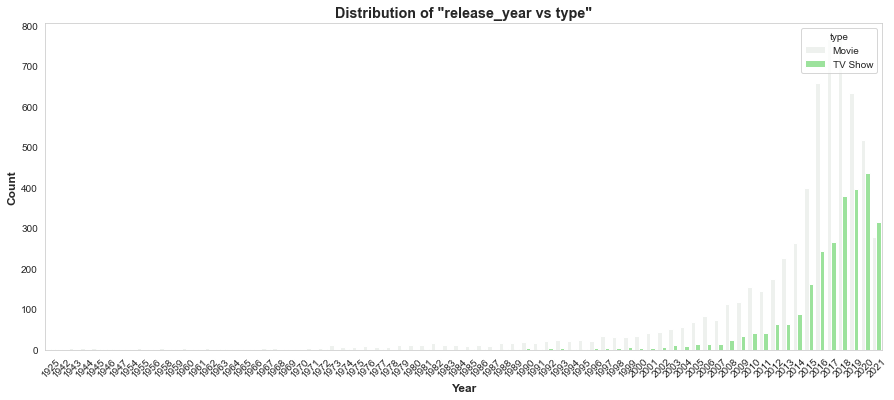

In [81]:
# distribution of release_year

plt.figure(figsize=(15,6))
sns.countplot(x=df['release_year'], 
              color='lightgreen', hue=df['type'])

plt.xlabel('Year', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Count', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "release_year vs type"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_yearvstype.png')
plt.grid(False)
plt.show()

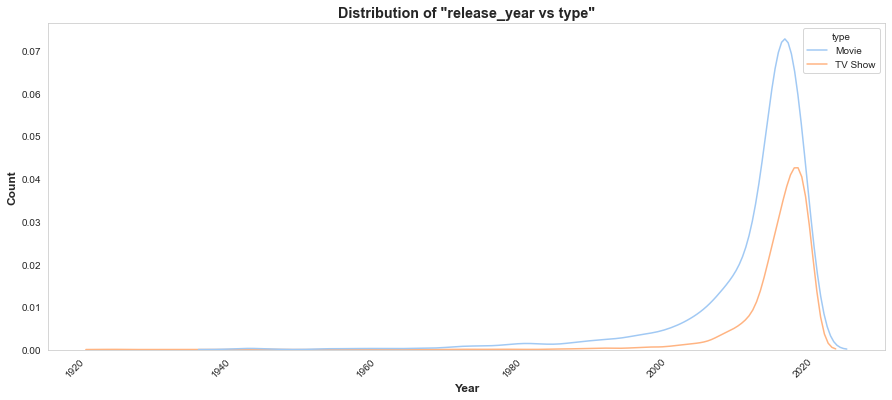

In [82]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df['release_year'], 
              palette='pastel', hue=df['type'])

plt.xlabel('Year', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Count', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "release_year vs type"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_yearvstype_kde.png')
plt.grid(False)
plt.show()

In [83]:
# From the date_added column, is there any pattern on which month the film is commonly released?
month = []

for i in df['date_added']:
    month.append(i.month)

month = pd.Series(data=month)

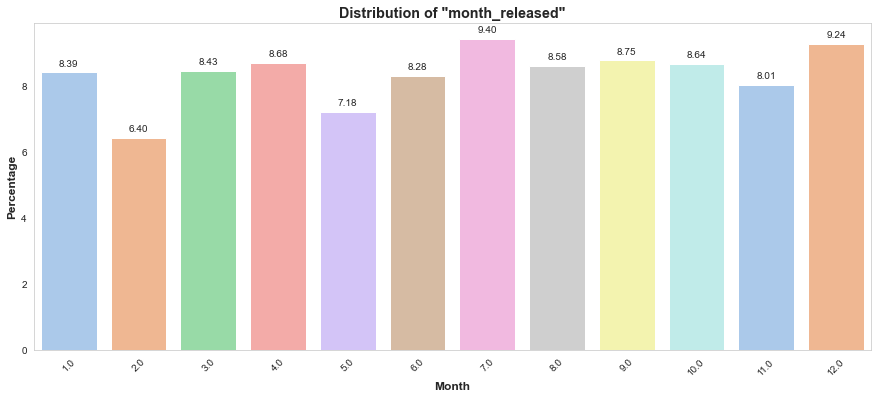

In [84]:
# distribution of month release

plt.figure(figsize=(15,6))
splot = sns.barplot(x =month.value_counts(normalize=True).index, 
            y =month.value_counts(normalize=True).values*100,
            palette='pastel', 
           )

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Month', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "month_released"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_month.png')
plt.grid(False)
plt.show()

In [55]:
# From the date_added column, is there any pattern on which day the film is commonly released?
day = []

for i in df['date_added']:
    day.append(i.day)

day = pd.Series(data=day)
df = pd.concat([df, day], axis=1)

In [59]:
df.columns = ['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'day']

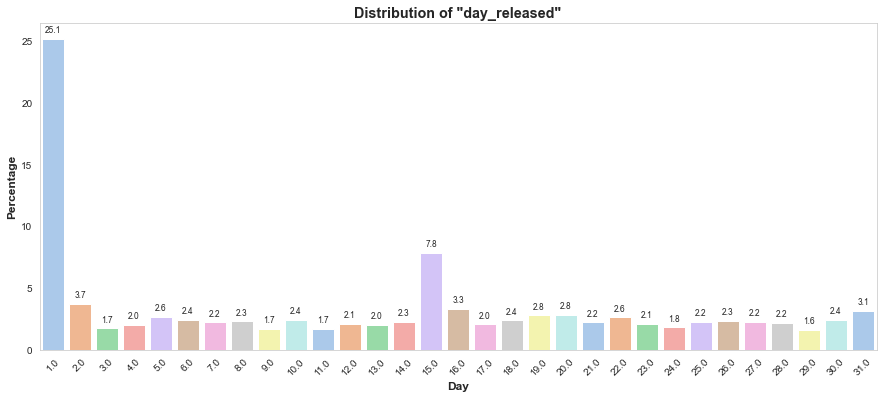

In [85]:
# distribution of day release

plt.figure(figsize=(15,6))
splot = sns.barplot(x =day.value_counts(normalize=True).index, 
            y =day.value_counts(normalize=True).values*100,
            palette='pastel',
           )

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize='small')

plt.xlabel('Day', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "day_released"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_day.png')
plt.grid(False)
plt.show()

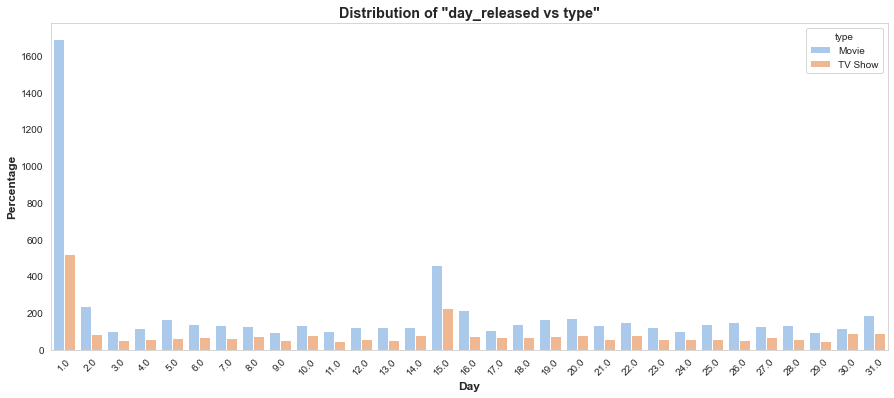

In [86]:
# distribution of day release

plt.figure(figsize=(15,6))
splot = sns.countplot(x =df['day'], 
            hue=df['type'],
            palette='pastel',
           )

# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points',
#                   fontsize='small')

plt.xlabel('Day', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "day_released vs type"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_dayvstype.png')
plt.grid(False)
plt.show()

In [87]:
def min_grouping(x):
    x = x.strip()
    x = x.split(' ')[0]
    x = int(x)
    
    if x<=30:
        return '<= 30 min'
    elif x<=60:
        return '30 - 60 min'
    elif x<=90:
        return '60 - 90 min'
    elif x<=150:
        return '90 - 150 min'
    elif x<=210:
        return '150 - 210 min'
    else:
        return '>210 min'

def duration_grouping(x):
    if type(x) == type(0.1):
        return x
    else:
        if 'season' in x.lower():
            return x
        elif 'min' in x.lower():
            return min_grouping(x)
        else:
            return x
        

df['duration_group'] = df['duration'].apply(lambda x: duration_grouping(x))

In [88]:
df[df['type'] == 'Movie']['duration_group'].value_counts()

90 - 150 min     3893
60 - 90 min      1503
30 - 60 min       357
150 - 210 min     234
<= 30 min         130
>210 min           11
Name: duration_group, dtype: int64

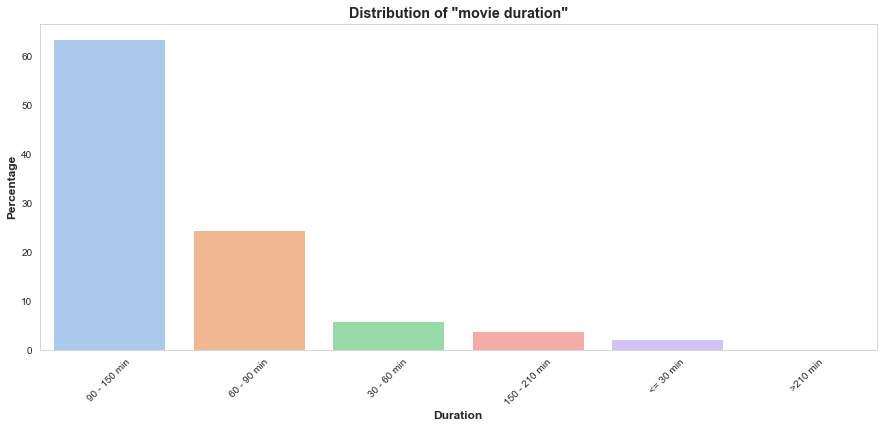

In [89]:
# distribution of movie duration

plt.figure(figsize=(15,6))
sns.barplot(x =df[df['type'] == 'Movie']['duration_group'].value_counts(normalize=True).index, 
            y =df[df['type'] == 'Movie']['duration_group'].value_counts(normalize=True).values*100,
            palette='pastel', 
           )

plt.xlabel('Duration', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "movie duration"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_movieduration.png')
plt.grid(False)
plt.show()

In [90]:
df[df['type'] == 'TV Show']['duration_group'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration_group, dtype: int64

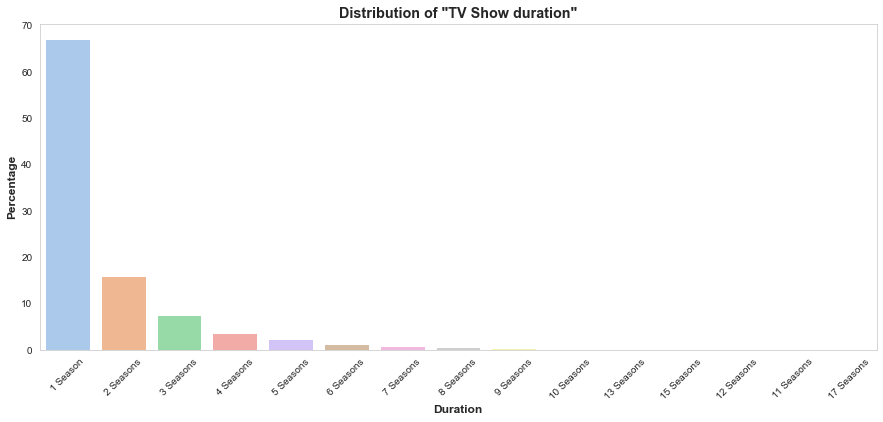

In [91]:
# distribution of TV Show duration

plt.figure(figsize=(15,6))
sns.barplot(x =df[df['type'] == 'TV Show']['duration_group'].value_counts(normalize=True).index, 
            y =df[df['type'] == 'TV Show']['duration_group'].value_counts(normalize=True).values*100,
            palette='pastel', 
           )

plt.xlabel('Duration', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "TV Show duration"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_tvduration.png')
plt.grid(False)
plt.show()

In [92]:
# director name distribuiton
# df['director'].nunique()

director = df.dropna(axis=0, subset=['director'])
director = director['director'].str.split(', ', expand=True)
director = director.stack()
director = director.reset_index(level = 1, drop = True)

director.value_counts(normalize=True).head(10)

Rajiv Chilaka          0.003153
Jan Suter              0.003009
Raúl Campos            0.002723
Suhas Kadav            0.002293
Marcus Raboy           0.002293
Jay Karas              0.002150
Cathy Garcia-Molina    0.001863
Jay Chapman            0.001720
Youssef Chahine        0.001720
Martin Scorsese        0.001720
dtype: float64

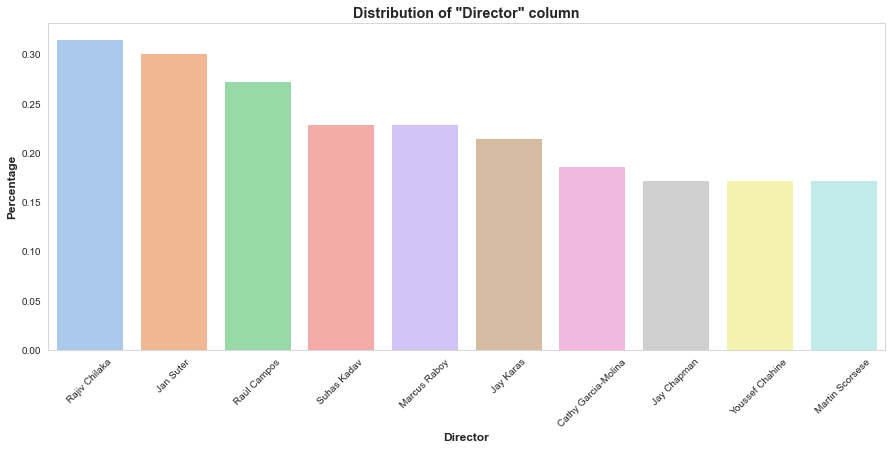

In [93]:
# distribution of top 10 directors

plt.figure(figsize=(15,6))
sns.barplot(x =director.value_counts(normalize=True).head(10).index, 
            y =director.value_counts(normalize=True).head(10).values*100,
            palette='pastel', 
           )

plt.xlabel('Director', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "Director" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_director.png')
plt.grid(False)
plt.show()

In [94]:
# cast name distribution

cast = df.dropna(axis=0, subset=['cast'])
cast = cast['cast'].str.split(', ', expand=True)
cast = cast.stack()
cast = cast.reset_index(level = 1, drop = True)

cast.value_counts(normalize=True).head(10)

Anupam Kher         0.000671
Shah Rukh Khan      0.000546
Julie Tejwani       0.000515
Naseeruddin Shah    0.000499
Takahiro Sakurai    0.000499
Rupa Bhimani        0.000483
Akshay Kumar        0.000468
Om Puri             0.000468
Yuki Kaji           0.000452
Paresh Rawal        0.000437
dtype: float64

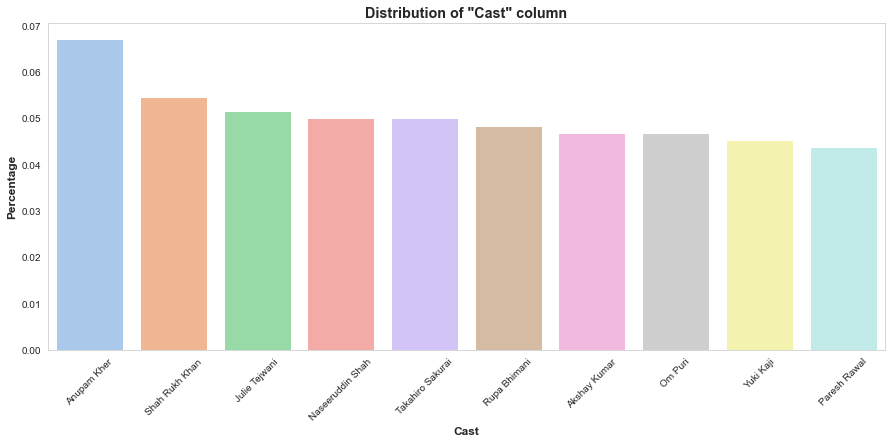

In [95]:
# distribution of top 10 casts

plt.figure(figsize=(15,6))
sns.barplot(x =cast.value_counts(normalize=True).head(10).index, 
            y =cast.value_counts(normalize=True).head(10).values*100,
            palette='pastel', 
           )

plt.xlabel('Cast', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "Cast" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_cast.png')
plt.grid(False)
plt.show()

In [96]:
# rating distribution

rating = df['rating'].value_counts(normalize=True).reset_index()
rating = rating.drop(labels=[14,15,16], axis=0) # drop error value
rating.columns = ['rating', 'portion']
rating

,rating,portion
0,TV-MA,0.364308
1,TV-14,0.245371
2,TV-PG,0.098035
3,R,0.090765
4,PG-13,0.055663
5,TV-Y7,0.037942
6,TV-Y,0.034874
7,PG,0.032603
8,TV-G,0.024991
9,NR,0.009088


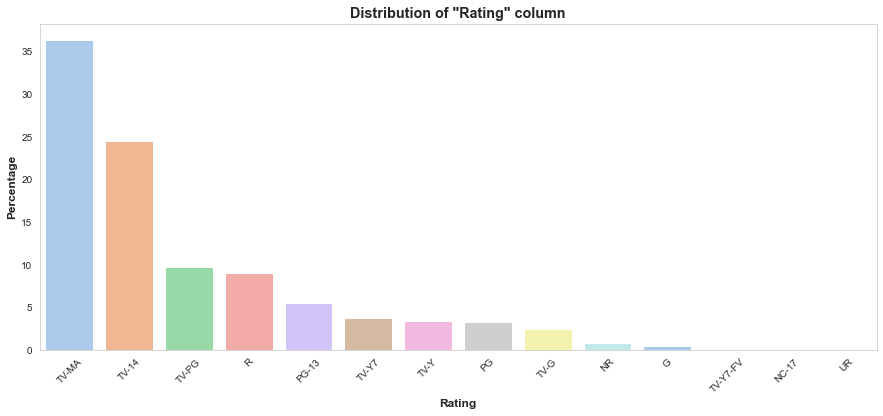

In [97]:
# distribution of rating

plt.figure(figsize=(15,6))
sns.barplot(x =rating['rating'], 
            y =rating['portion']*100,
            palette='pastel', 
           )

plt.xlabel('Rating', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "Rating" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_rating.png')
plt.grid(False)
plt.show()

In [98]:
df[df['rating'].isin(['74 min', '84 min', '66 min'])].index

Int64Index([5541, 5794, 5813], dtype='int64')

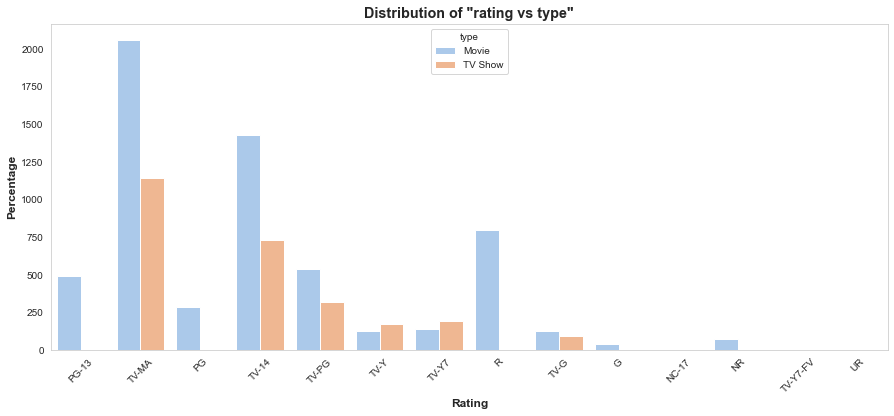

In [99]:
# distribution of rating

rating = df.drop(axis=0, 
                 labels=df[df['rating'].isin(['74 min', '84 min', '66 min'])].index)

plt.figure(figsize=(15,6))
sns.countplot(x =rating['rating'],
            hue=rating['type'],
            palette='pastel', 
           )

plt.xlabel('Rating', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "rating vs type"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_ratingvstype.png')
plt.grid(False)
plt.show()

In [100]:
# cast name distribution

listed_in = df.dropna(axis=0, subset=['listed_in'])
listed_in = listed_in['listed_in'].str.split(', ', expand=True)
listed_in = listed_in.stack()
listed_in = listed_in.reset_index(level = 1, drop = True)

listed_in.value_counts(normalize=True).head(10)

International Movies        0.142421
Dramas                      0.125602
Comedies                    0.086633
International TV Shows      0.069917
Documentaries               0.044972
Action & Adventure          0.044455
TV Dramas                   0.039487
Independent Movies          0.039124
Children & Family Movies    0.033173
Romantic Movies             0.031879
dtype: float64

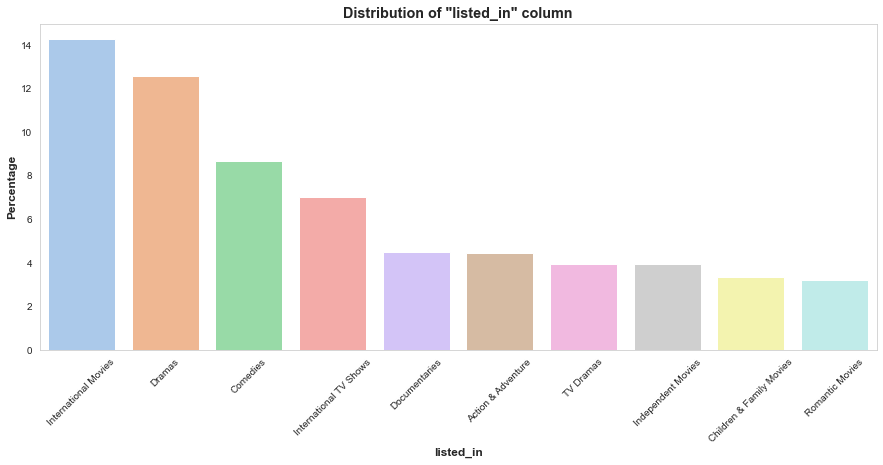

In [101]:
# distribution of top 10 listed_in movie

plt.figure(figsize=(15,6))
sns.barplot(x =listed_in.value_counts(normalize=True).head(10).index, 
            y =listed_in.value_counts(normalize=True).head(10).values*100,
            palette='pastel', 
           )

plt.xlabel('listed_in', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "listed_in" column', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.savefig('.\\assets\\dist_listedin.png')
plt.grid(False)
plt.show()